### Random Forest Model

In this project we will building random forest model for an Airline. Here, we will train, tune, and evaluate a random forest model using data from spreadsheet of survey responses from 129,880 customers. It includes data points such as class, flight distance, and inflight entertainment. Random forest model will be used to predict whether a customer will be satisfied with their flight experience.



# Step 1: Imports

Import relevant Python libraries and modules, including `numpy` and `pandas`libraries for data processing; the `pickle` package to save the model; and the `sklearn` library, containing:
- The module `ensemble`, which has the function `RandomForestClassifier`
- The module `model_selection`, which has the functions `train_test_split`, `PredefinedSplit`, and `GridSearchCV`
- The module `metrics`, which has the functions `f1_score`, `precision_score`, `recall_score`, and `accuracy_score`

In [1]:
# Import `numpy`, `pandas`, `pickle`, and `sklearn`.
# Import the relevant functions from `sklearn.ensemble`, `sklearn.model_selection`, and `sklearn.metrics`.
import numpy as np
import pandas as pd

import pickle as pkl

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, PredefinedSplit, GridSearchCV
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

import matplotlib.pyplot as plt

In [4]:
# Import the data
air_data = pd.read_csv("/content/Invistico_Airline.csv")

# Step 2: Data cleaning

In [5]:
# Display first 10 rows.
air_data.head(10)

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0
5,satisfied,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,3,...,2,2,5,4,5,5,4,2,0,0.0
6,satisfied,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,3,...,5,5,5,0,5,5,5,3,17,15.0
7,satisfied,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,3,...,2,2,3,3,4,5,4,2,0,0.0
8,satisfied,Loyal Customer,56,Personal Travel,Business,73,0,0,0,3,...,5,4,4,0,1,5,4,4,0,0.0
9,satisfied,Loyal Customer,22,Personal Travel,Eco,1556,0,0,0,3,...,2,2,2,4,5,3,4,2,30,26.0


In [6]:
# Display variable names and types.
air_data.dtypes

satisfaction                          object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
dtype: obj

There are three types of variables included in the data: int64, float64, and object. The object variables are satisfaction, customer type, type of travel, and class.

In [7]:
# Identify the number of rows and the number of columns.
air_data.shape

(129880, 22)

In [8]:
# Checking the missing values in the rows of data
air_data.isna().any(axis=1).sum()

393

There are 393 rows with missing values in the data.

In [9]:
# Drop missing values.
# Save the DataFrame in variable `air_data_subset`.
air_data_subset = air_data.dropna(axis=0)

In [10]:
# Display the first 10 rows.
air_data_subset.head(10)

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0
5,satisfied,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,3,...,2,2,5,4,5,5,4,2,0,0.0
6,satisfied,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,3,...,5,5,5,0,5,5,5,3,17,15.0
7,satisfied,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,3,...,2,2,3,3,4,5,4,2,0,0.0
8,satisfied,Loyal Customer,56,Personal Travel,Business,73,0,0,0,3,...,5,4,4,0,1,5,4,4,0,0.0
9,satisfied,Loyal Customer,22,Personal Travel,Eco,1556,0,0,0,3,...,2,2,2,4,5,3,4,2,30,26.0


In [11]:
# Count of missing values.
air_data_subset.isna().sum()

satisfaction                         0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

In [12]:
# Convert categorical features to one-hot encoded features because the sklearn implementation of `RandomForestClassifier()`
# requires categorical features be encoded to numeric
air_data_subset_dummies = pd.get_dummies(air_data_subset,
                                         columns=['Customer Type','Type of Travel','Class'])

In [13]:
# Display the first 10 rows.
air_data_subset_dummies.head(10)

,satisfaction,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,...,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,satisfied,65,265,0,0,0,2,2,4,2,...,2,0,0.0,1,0,0,1,0,1,0
1,satisfied,47,2464,0,0,0,3,0,2,2,...,2,310,305.0,1,0,0,1,1,0,0
2,satisfied,15,2138,0,0,0,3,2,0,2,...,2,0,0.0,1,0,0,1,0,1,0
3,satisfied,60,623,0,0,0,3,3,4,3,...,3,0,0.0,1,0,0,1,0,1,0
4,satisfied,70,354,0,0,0,3,4,3,4,...,5,0,0.0,1,0,0,1,0,1,0
5,satisfied,30,1894,0,0,0,3,2,0,2,...,2,0,0.0,1,0,0,1,0,1,0
6,satisfied,66,227,0,0,0,3,2,5,5,...,3,17,15.0,1,0,0,1,0,1,0
7,satisfied,10,1812,0,0,0,3,2,0,2,...,2,0,0.0,1,0,0,1,0,1,0
8,satisfied,56,73,0,0,0,3,5,3,5,...,4,0,0.0,1,0,0,1,1,0,0
9,satisfied,22,1556,0,0,0,3,2,0,2,...,2,30,26.0,1,0,0,1,0,1,0


In [14]:
# Display variables again
air_data_subset_dummies.dtypes

satisfaction                          object
Age                                    int64
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
Customer Type_Loyal Customer           uint8
Customer Type_disloyal Customer        uint8
Type of Travel_Business travel         uint8
Type of Tr

All of the following changes could be observed:



1.  Customer Type --> Customer Type_Loyal Customer and Customer Type_disloyal Customer
2.   Type of Travel --> Type of Travel_Business travel and Type of Travel_Personal travel
3. Class --> Class_Business, Class_Eco, Class_Eco Plus





# Step 3: Model building

In [15]:
# Separate the dataset into labels (y) and features (X).
y = air_data_subset_dummies["satisfaction"]
X = air_data_subset_dummies.drop("satisfaction", axis=1)

In [16]:
# Separate into train, validate, test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 0)


In [17]:
# Tuning the model with the help of GridSearch CV

# Determine set of hyperparameters.
cv_params = {'n_estimators' : [50,100],
              'max_depth' : [10,50],
              'min_samples_leaf' : [0.5,1],
              'min_samples_split' : [0.001, 0.01],
              'max_features' : ["sqrt"],
              'max_samples' : [.5,.9]}

In [18]:
# Create list of split indices.
split_index = [0 if x in X_val.index else -1 for x in X_train.index]
custom_split = PredefinedSplit(split_index)

In [19]:
# Instantiate model.
rf = RandomForestClassifier(random_state=0)

In [20]:
# Using GridSearchCV to search over specified parameters.
rf_val = GridSearchCV(rf, cv_params, cv=custom_split, refit='f1', n_jobs = -1, verbose = 1)

In [21]:
%%time

# Fit the model.
rf_val.fit(X_train, y_train)

Fitting 1 folds for each of 32 candidates, totalling 32 fits
CPU times: user 7.82 s, sys: 289 ms, total: 8.11 s
Wall time: 1min 31s


GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ..., -1, -1])),
             estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [10, 50], 'max_features': ['sqrt'],
                         'max_samples': [0.5, 0.9],
                         'min_samples_leaf': [0.5, 1],
                         'min_samples_split': [0.001, 0.01],
                         'n_estimators': [50, 100]},
             refit='f1', verbose=1)

In [22]:
# Obtain optimal parameters.
rf_val.best_params_

{'max_depth': 50,
 'max_features': 'sqrt',
 'max_samples': 0.9,
 'min_samples_leaf': 1,
 'min_samples_split': 0.001,
 'n_estimators': 50}

# Step 4: Results and evaluation

Use the selected model to predict on your test data. Use the optimal parameters found via GridSearchCV.

In [23]:
# Use optimal parameters on GridSearchCV.
rf_opt = RandomForestClassifier(n_estimators = 50, max_depth = 50,
                                min_samples_leaf = 1, min_samples_split = 0.001,
                                max_features="sqrt", max_samples = 0.9, random_state = 0)

In [24]:
# Fit the optimal model.
rf_opt.fit(X_train, y_train)

RandomForestClassifier(max_depth=50, max_samples=0.9, min_samples_split=0.001,
                       n_estimators=50, random_state=0)

In [25]:
# Predict on test set.
y_pred = rf_opt.predict(X_test)

In [26]:
# Get precision score.
pc_test = precision_score(y_test, y_pred, pos_label = "satisfied")
print("The precision score is {pc:.3f}".format(pc = pc_test))

The precision score is 0.950


In [27]:
# Get recall score.
rc_test = recall_score(y_test, y_pred, pos_label = "satisfied")
print("The recall score is {rc:.3f}".format(rc = rc_test))

The recall score is 0.945


In [28]:
# Get accuracy score.
ac_test = accuracy_score(y_test, y_pred)
print("The accuracy score is {ac:.3f}".format(ac = ac_test))

The accuracy score is 0.942


In [29]:
# Get F1 score.
f1_test = f1_score(y_test, y_pred, pos_label = "satisfied")
print("The F1 score is {f1:.3f}".format(f1 = f1_test))

The F1 score is 0.947


The random forest model predicted satisfaction with more than 94.2% accuracy. The precision is over 95% and the recall is approximately 94.5%.

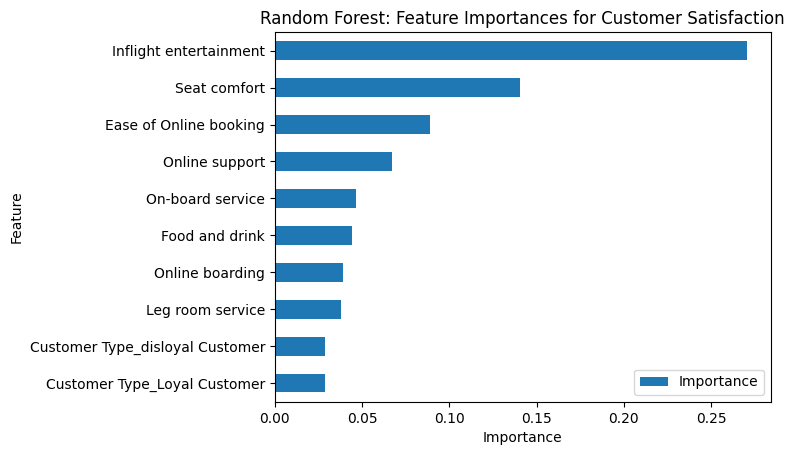

In [38]:
# Get feature importances
feat_impt = rf_opt.feature_importances_

# Get indices of top 10 features
ind = np.argpartition(feat_impt, -10)[-10:]

# Get column labels of top 10 features
feat = X.columns[ind]

# Filter `feat_impt` to consist of top 10 feature importances
feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Random Forest: Feature Importances for Customer Satisfaction", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

The plot above shows that in this random forest model, `Inflight entertainment`, `Seat comfort` and `Ease of Online booking` have the highest importance, in that order. These variables are most helpful in predicting the outcome variable, `satisfaction`.